# Task 3.0.1 – Recap: Initiation

Face recognition systems are built on the idea that each person has a particular face structure, and using the facial symmetry, computerized face-matching is possible. 

The work on face recognition has begun in the 1960's, the results of which are being used for security in various institutions and firms throughout the world. 

The images must be processed correctly for computer based face recognition. The face and its structural properties should be identified carefully, and the resulting image must be converted to two dimensional digital data.

![Img](./data/face_recognition.png)

For this task we use the dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) which contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured.



#### Loading the Data (Labeled Faces in the Wild Dataset)
The lfw_people dataset is also one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the dataset.

In [1]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

lfw_people.data

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

But it's really large, so just use this csv file containing a dump.

In [2]:
import pandas as pd

df = pd.read_csv('./data/lfw_people.csv', index_col = 0)

### Task 3.0.1-1:  Explore data

**Note: each image has a height of 50 and a width of 37.**

* Explore the dataset.
* Transform the target column to a numeric feature.
* Try to plot an image from the dataset. *Note: see Task 2.3 (Exercise 2)*

In [3]:
# Code up your solution here...

In [7]:
df.shape

(1288, 1851)

In [4]:
df.head()

0           1           2           3           4           5  \
0  254.000000  254.000000  251.666670  240.333330  185.333330  144.000000   
1   39.666668   50.333332   47.000000   54.666668   99.000000  120.666664   
2   89.333336  104.000000  126.000000  141.333330  152.000000  155.333330   
3   16.666666    7.666666    7.000000    6.000000   16.333334   70.000000   
4  122.666664  121.000000  126.666664  129.333330  129.333330  134.666670   

           6          7          8           9  ...        1841        1842  \
0  174.00000  196.66667  196.00000  192.333330  ...  100.000000   99.000000   
1  139.66667  157.66667  171.00000  177.666670  ...   59.666668   73.333336   
2  155.33333  160.00000  163.00000  166.666670  ...  111.666664  100.333336   
3  170.00000  169.66667  161.00000  106.333336  ...  190.000000  230.000000   
4  142.00000  142.66667  147.33333  152.000000  ...   17.666666    6.666666   

         1843        1844        1845        1846        1847        1848  \
0   95.666664   92.333336   90.666664   89.666664   87.333336   88.666664   
1   77.666664   83.666664  103.333336  123.000000  117.666664  115.000000   
2  106.666664  125.000000  117.666664  125.000000  175.333330  183.333330   
3  238.000000  239.333330  233.666670  134.000000   27.666666   38.000000   
4    5.666666    5.666666   10.333333   10.666667   22.000000   61.666668   

         1849         target  
0   86.666664    Hugo Chavez  
1  133.666670     Tony Blair  
2  183.000000  George W Bush  
3   51.333332   Colin Powell  
4   70.666664   Ariel Sharon  

[5 rows x 1851 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 1287
Columns: 1851 entries, 0 to target
dtypes: float64(1850), object(1)
memory usage: 18.2+ MB


In [6]:
df.describe()

0            1            2            3            4  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean     92.709110    97.707298   107.884058   120.577640   132.210404   
std      46.720340    44.968495    43.071312    41.742403    40.084018   
min       0.000000     0.000000     0.333333     1.000000     1.666667   
25%      59.000000    65.000000    79.000000    95.000000   107.916666   
50%      90.000000    96.166668   106.333336   120.000000   133.000000   
75%     123.749998   126.666664   136.333330   148.666670   159.333330   
max     254.000000   254.000000   251.666670   247.000000   245.333330   

                 5            6            7            8            9  ...  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000  ...   
mean    141.260870   148.009058   153.275103   158.001294   162.415631  ...   
std      37.327322    35.723989    34.822411    33.775392    32.583622  ...   
min       2.000000     3.666667    11.000000    11.333333    13.333333  ...   
25%     118.000000   124.666664   132.000000   137.333330   141.916667  ...   
50%     142.666670   148.666670   154.333330   159.333330   164.333330  ...   
75%     166.666670   172.416665   176.333330   180.333330   184.083333  ...   
max     246.666670   247.666670   252.666670   254.000000   253.666670  ...   

              1840         1841         1842         1843         1844  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean     96.088768   100.346791   106.546584   115.276915   123.762164   
std      45.593824    50.522455    56.975641    62.860324    69.106482   
min       1.000000     2.000000     1.000000     1.000000     1.000000   
25%      62.916667    63.333332    63.916667    67.250002    66.916666   
50%      92.500000    96.333336   101.000000   109.833332   117.666664   
75%     122.333336   128.666670   140.000000   157.000000   178.000000   
max     250.333330   250.666670   252.000000   253.333330   254.333330   

              1845         1846         1847         1848         1849  
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000  
mean    127.958333   125.872153   120.618271   113.312112   105.595238  
std      72.243458    74.961605    77.212778    77.594587    78.347433  
min       0.666667     0.000000     0.000000     0.000000     0.000000  
25%      66.333336    58.333332    46.666668    40.333332    34.333332  
50%     123.166668   120.666664   115.166668   101.833332    86.000000  
75%     191.750002   192.333330   193.083333   183.333330   172.833335  
max     254.666670   255.000000   255.000000   254.666670   255.000000  

[8 rows x 1850 columns]

### Transform the target column to a numeric feature.

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
target = le.fit_transform(df['target'])

In [16]:
target

array([5, 6, 3, ..., 5, 3, 5])

###  Try to plot an image from the dataset. Note: see Task 2.3 (Exercise 2)
each image has a height of 50 and a width of 37.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [46]:
pixels = df.iloc[0,:-1]
pixels = np.array(pixels, dtype='uint8')
pixels= pixels.reshape((50, 37))
plt.imshow(pixels, cmap='gray')
plt.show()

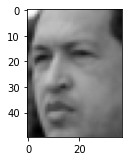

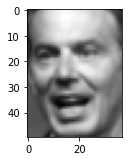

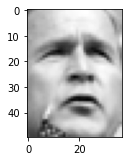

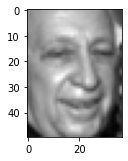

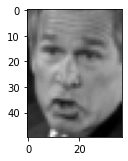

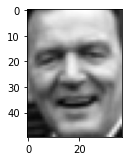

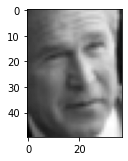

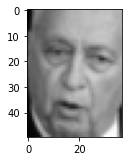

In [49]:
for i in range(0,10):
    plt.figure(figsize=(20,4))
    pixels = df.iloc[i,:-1]
    pixels = np.array(pixels, dtype='uint8')
    pixels= pixels.reshape((50, 37))
    plt.subplot(1, 10, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.show()  